## Detecting anomaly on one year's dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest

import warnings
warnings.filterwarnings("ignore")

In [2]:
anmly_df = pd.read_csv("Downloads/anomaly_detection.csv")

In [3]:
date_range = pd.date_range(start='2016-01-01', periods=365, freq='D')

# Add the Date Column to the DataFrame for clarity
anmly_df['Date'] = date_range
anmly_df.set_index('Date', inplace=True)

#This is the interval where we know that anomaly occured so skipping it from training

In [4]:
anm_df = anmly_df.loc['2016-01-14':'2016-02-21']

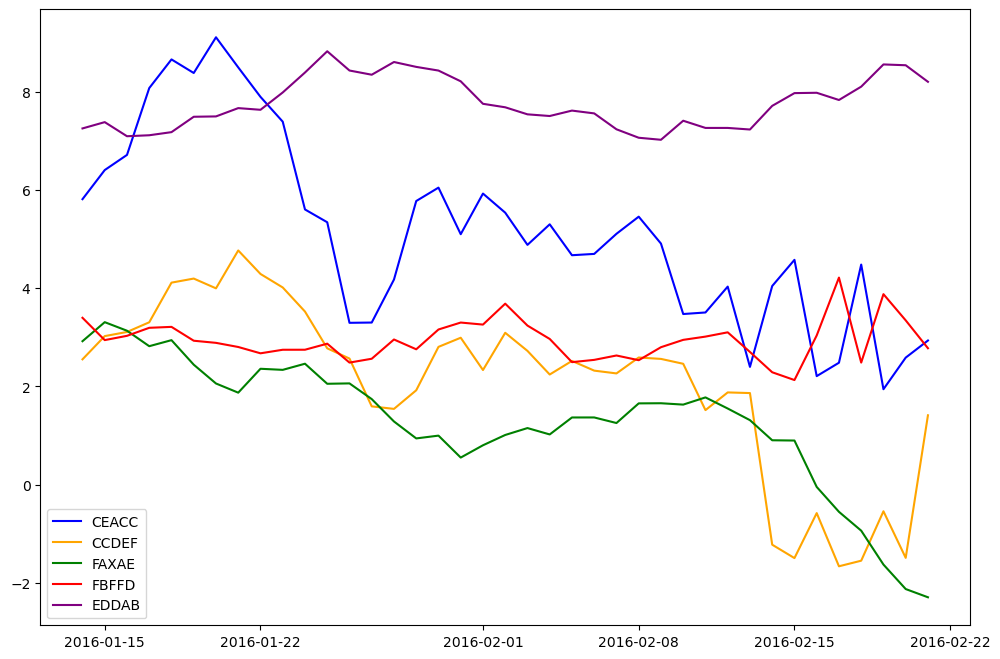

In [5]:
plt.figure(figsize=(12, 8))
plt.plot(anm_df.index, anm_df['CEACC'], label='Sensor1', color='blue')
plt.plot(anm_df.index, anm_df['CCDEF'], label='Sensor2', color='orange')
plt.plot(anm_df.index, anm_df['FAXAE'], label='Sensor3', color='green')
plt.plot(anm_df.index, anm_df['FBFFD'], label='Sensor4', color='red')
plt.plot(anm_df.index, anm_df['EDDAB'], label='Sensor5', color='purple')
plt.legend(anm_df.columns)

In [6]:
class anomaly_detection:
    def __init__(self, data):
        self.data = data

    
    def isolation_forest_anomalies(self, contamination=0.05):
        #Spliting the train-test data
        date_range = pd.date_range(start='2016-01-01', periods=365, freq='D')

        # Add the Date Column to the DataFrame for clarity
        
        self.data['Date'] = date_range
        self.data.set_index('Date', inplace=True)
        
        train_data = self.data.loc['2016-01-01':'2016-09-30']
        test_data = self.data.loc['2016-10-01' : '2016-12-30']
        # Remove the known issue period from the training data
        train_data = train_data.drop(train_data['2016-02-14':'2016-02-21'].index)
        
        # Fit the model
        clf = IsolationForest(n_estimators=50,contamination=contamination, random_state=3, bootstrap=True)
        clf.fit(train_data)
        
        # Predict anomalies
        anomaly_labels = clf.predict(test_data)
        
        # Convert to DataFrame
        anomalies = pd.DataFrame({
            'anomaly': anomaly_labels,
        }, index=test_data.index)
        
        return anomalies
    def anomaly_duration(self, df, min_duration=3, max_duration=14):
        df = self.isolation_forest_anomalies()
            # Identify the runs of anomalies
        df['run'] = (df['anomaly'] != df['anomaly'].shift()).cumsum()
        df['run_length'] = df.groupby('run').cumcount() + 1

        # Filter runs where anomalies are present and get the max length
        runs = df[df['anomaly'] == -1].groupby('run')['run_length'].max()
        # Get valid runs that meet the duration criteria
        valid_runs = runs[(runs >= min_duration) & (runs <= max_duration)]
        anomaly_ranges = {}
        for run in valid_runs.index:
            # Get the indices of the run
            run_df = df[df['run'] == run]
            start_idx = run_df.index.min()
            end_idx = run_df.index.max()
            
            # Store the range in the dictionary
            anomaly_ranges["Run"] = (start_idx, end_idx)
        
        return {
            "Total number of anomalies are:": len(valid_runs),
            "Anomaly ranges:": anomaly_ranges
        }

        
        return final_alert_ranges

In [7]:
ab = anomaly_detection(anmly_df)
if_anomalies = ab.isolation_forest_anomalies()
az = ab.anomaly_duration(if_anomalies)
print(az)

{'Total number of anomalies are:': 1, 'Anomaly ranges:': {'Run': (Timestamp('2016-11-14 00:00:00'), Timestamp('2016-11-20 00:00:00'))}}
